# Represent extracted variables into waffle plots

## Modules requirement

### Import external modules 

In [1]:
import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)
import plotly.graph_objs as go
import pandas as pd
from pathlib import Path
import os

### Import openalea modules

In [2]:
from openalea.mtg.algo import split, orders, union
from openalea.mtg.io import read_mtg_file, write_mtg

### Import strawberry modules

In [3]:
from openalea.strawberry.import_mtgfile import import_mtgfile
from openalea.strawberry.analysis import extract_at_plant_scale, extract_at_node_scale, extract_at_module_scale, df2waffle, plot_waffle, plot_pie 

## Import MTG

In [4]:
mtg1 = import_mtgfile(filename= ["Gariguette"])
metaMTG= import_mtgfile(filename=["Gariguette", "Capriss"])

## Waffle plot at node scale

### Create the waffle dataframe

First we extract the data at node scale, then the waffle is computed for:
* a selected data (here the last one) 
* a variable in the extracted data

In [5]:
df = extract_at_node_scale(mtg1)
date = df['date']
variable = 'branching_type'

tmp = df2waffle(df, index='rank', date=date[len(date)-1], variable=variable)

### Plot the waffle

The waffle plot has a default template for the layout, but it can be manually provided. 

In [6]:
l_names = {"1":"Stolon", 
           "2":"Vegetative bud",
           "3":"Initiated bud",
           "4":"Aborted bud",
           "5":"Floral bud",
           "6":"Branch crown"}

yticks_l =list(range(0,len(tmp.index)))
yticks_l.reverse()
layout={
    'xlabel': 'Plant',
    'xticks': range(0,len(tmp.columns)),
    'xticks_label': range(1,len(tmp.columns)+1),
    'ylabel': 'Node',
    'yticks': range(0,len(tmp.index)),
    'yticks_label': yticks_l,
}

Plot the waffle dataframe

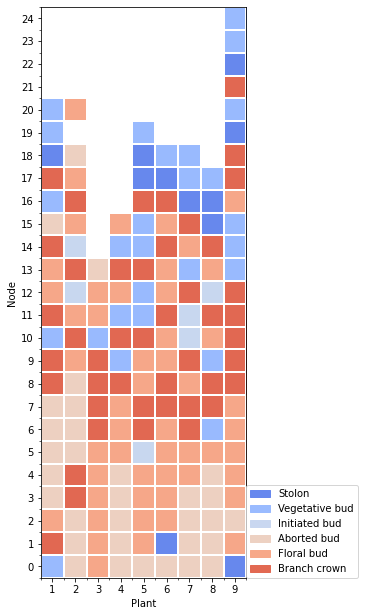

In [7]:
fig=plot_waffle(tmp, 
                layout=layout, 
                legend_name=l_names, 
                plot_func='matplotlib')
# fig

Three library are available for the ploting: 
* 'matplotlib'
* 'plotly.imshow'
* 'plotly.heatmap'

In [8]:
fig=plot_waffle(tmp, 
                layout=layout, 
                legend_name=l_names, 
                plot_func='plotly.heatmap')
fig

## 3. Waffle at module scale

### 3.1 Create waffle dataframe

At module scale, the values are aggregated for each module.
The aggregate function can be:
* 'mean'
* 'median'
* 'lambda x: ' '.join(x)', for qualitative variables

In [9]:
df = extract_at_module_scale(mtg1)

date = df['date']
variable = 'nb_visible_leaves' # quantitative variable example: nb_visible_leaves
aggfunc = "mean" # quantitative: "mean", "median" | qualitative: lambda x: ' '.join(x)

tmp=df2waffle(df, index='order', 
              date=date[len(date)-1], 
              variable=variable, 
              aggfunc=aggfunc,
              crosstab=False)


### 3.2 plot the waffle

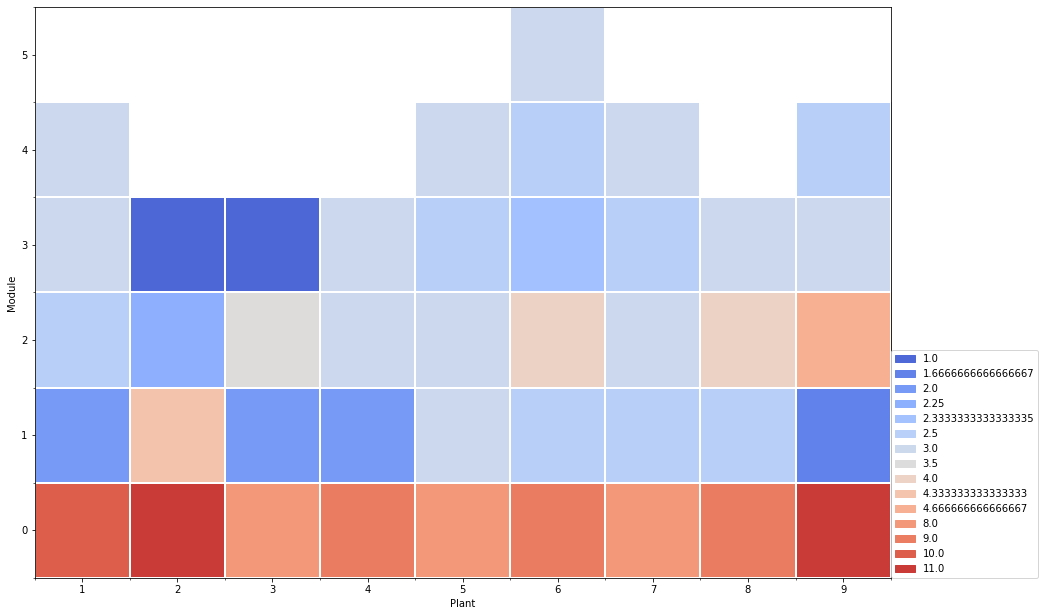

In [10]:
yticks_l =list(range(0,len(tmp.index)))
yticks_l.reverse()

layout={
    'xlabel': 'Plant',
    'xticks': range(0,len(tmp.columns)),
    'xticks_label': tmp.columns,
    'ylabel': 'Module',
    'yticks': range(0,len(tmp.index)),
    'yticks_label': yticks_l,
}


fig = plot_waffle(tmp,
                  layout=layout,
                  plot_func='matplotlib')
# fig

### 3.3 Crosstab

At module scale, the waffle dataframe can be computed with crosstab at the 'order' variable.

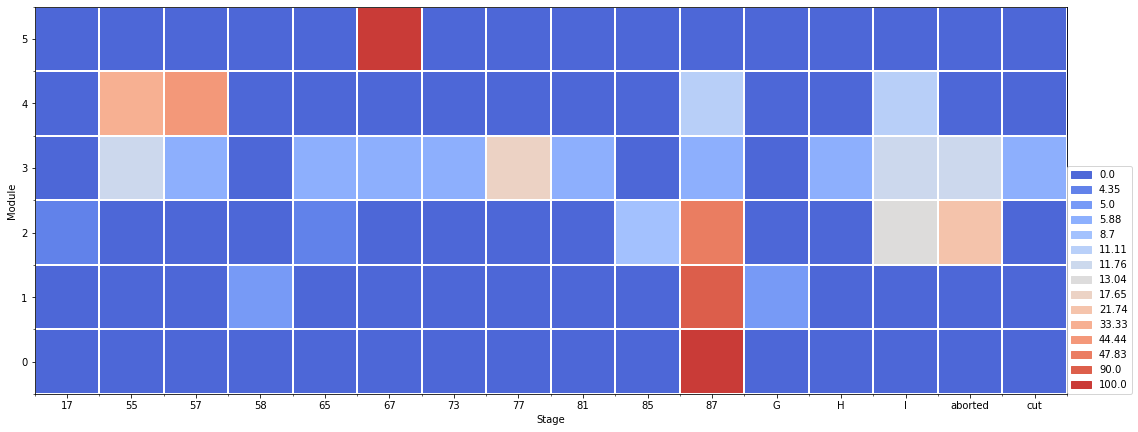

In [11]:
df = extract_at_module_scale(mtg1)
date = df['date']
tmp=df2waffle(df, index='order', 
              date=date[len(date)-1], 
              variable='stage', 
              aggfunc=lambda x: ' '.join(x),
              crosstab=True)


yticks_l =list(range(0,len(tmp.index)))
yticks_l.reverse()

layout={
    'xlabel': 'Stage',
    'xticks': range(0,len(tmp.columns)),
    'xticks_label': tmp.columns,
    'ylabel': 'Module',
    'yticks': range(0,len(tmp.index)),
    'yticks_label': yticks_l,
    'width': 900
}


fig = plot_waffle(tmp,
                  layout=layout,
                  plot_func='matplotlib')


When the crosstab is used, the waffle dataframe can be ploted as pie

In [12]:
pie_plt = plot_pie(tmp)
pie_plt.show()